In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr

import random
import torch as tc


In [38]:
N = 40 # Number of colocation points

In [39]:
# Inicializando listas para armazenar os erros acumulados
erros_abs_acumulados = []

# Loop para carregar os arquivos e calcular os erros
for i in range(1, 101):
    caminho = f"/home/gubio/CODESPACE/Pinn-inverse-for-opem-quantum-system/With fields/data/parametro_withfields_N{N}_seed{i}_std0.csv"
    df = pd.read_csv(caminho, index_col=0)
    
    # Calculando erros
    valor_real = df['treino'].str.strip('[]').astype(float)
    valor_previsto = df['previsto'].str.strip('[]').astype(float)
    
    erro_abs = (valor_real - valor_previsto)**2# Absolute Error
    
    
    # Acumulando erros
    erros_abs_acumulados.append(erro_abs)

# Calculando a média, desvio padrão, máximo e mínimo dos erros
erros_abs_concat = pd.concat(erros_abs_acumulados, axis=1)




In [40]:
# erros_abs_concat

This is a statistical description for each seed.

In [41]:
(erros_abs_concat).describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,...,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01
mean,5.088205e-07,3.453311e-07,1.689679e-05,2.415825e-07,1.268963e-08,9.351655e-07,2.880444e-08,1.103202e-07,2.768318e-07,2.881626e-08,...,2.918921e-07,4.393944e-08,3.672877e-07,4.312827e-06,2.883272e-07,8.319432e-07,3.222270e-07,5.062630e-08,1.265689e-07,8.447290e-08
std,5.835051e-07,4.727947e-07,1.611731e-05,2.646983e-07,1.764093e-08,1.362113e-06,2.351257e-08,1.564737e-07,3.171335e-07,3.892210e-08,...,4.430086e-07,5.967403e-08,4.301771e-07,4.058242e-06,4.301163e-07,1.329230e-06,3.829409e-07,5.700250e-08,1.614283e-07,9.655228e-08
min,4.673655e-10,9.454619e-11,5.967068e-07,1.403930e-11,4.410693e-11,2.648714e-09,1.995127e-10,2.108291e-09,5.677694e-10,7.018621e-12,...,5.781334e-10,3.885289e-10,3.020789e-10,4.198656e-09,2.746451e-09,9.364618e-10,1.752533e-08,6.516470e-10,3.065953e-11,5.073647e-12
25%,5.486798e-08,4.066572e-08,2.613023e-06,5.860157e-08,1.759034e-09,1.822949e-07,1.030487e-08,1.633549e-08,8.935752e-09,1.522898e-09,...,1.376923e-08,8.895334e-09,4.355963e-08,1.033038e-06,2.153782e-08,6.427142e-08,3.712603e-08,4.717854e-09,5.846943e-09,5.339985e-09
50%,2.296749e-07,5.795629e-08,1.153570e-05,2.236644e-07,5.847454e-09,3.294604e-07,2.129984e-08,4.335622e-08,1.158183e-07,1.052036e-08,...,1.211341e-07,1.786058e-08,1.952419e-07,4.214515e-06,8.256457e-08,2.778761e-07,1.419406e-07,2.531061e-08,6.732208e-08,2.806081e-08
75%,8.013560e-07,5.843284e-07,2.901492e-05,2.783689e-07,1.220722e-08,9.598220e-07,4.250940e-08,1.190948e-07,4.527356e-07,3.884745e-08,...,3.243318e-07,4.474302e-08,5.509512e-07,6.944702e-06,3.466657e-07,1.099497e-06,4.315992e-07,9.078291e-08,1.695738e-07,1.437352e-07
max,1.862847e-06,1.498016e-06,4.880244e-05,9.358231e-07,6.441309e-08,4.569638e-06,8.095248e-08,5.687583e-07,9.929713e-07,1.523288e-07,...,1.781870e-06,2.181656e-07,1.445143e-06,1.305150e-05,1.523690e-06,5.745116e-06,1.228645e-06,1.634140e-07,5.238190e-07,3.028873e-07


This is a statistical description for each parameter

In [42]:
names = [r'$\gamma_1$', r'$\gamma_2$', r'$\gamma_3$', r'$\gamma_4$',
         r'$JXX$', r'$JXY$', r'$JXZ$', r'$JYX$', r'$JYY$', r'$JYZ$',
         r'$JZX$', r'$JZY$', r'$JZZ$', r'$JIX$', r'$JIY$', r'$JIZ$',
         r'$JXI$', r'$JYI$', r'$JZI$']

# renomear as linhas no original (19 parâmetros)
erros_abs_concat.index = names

# se quiser o transposto com colunas renomeadas:
erros_abs_concat_T = erros_abs_concat.T.copy()
erros_abs_concat_T.columns = names

In [43]:
(erros_abs_concat.T).describe()

,$\gamma_1$,$\gamma_2$,$\gamma_3$,$\gamma_4$,$JXX$,$JXY$,$JXZ$,$JYX$,$JYY$,$JYZ$,$JZX$,$JZY$,$JZZ$,$JIX$,$JIY$,$JIZ$,$JXI$,$JYI$,$JZI$
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,2.943864e-07,8.572338e-07,8.234837e-07,8.192049e-07,1.084377e-06,1.307500e-06,4.053269e-06,1.032655e-06,8.282066e-07,2.637513e-06,1.027371e-06,7.487493e-07,7.226506e-07,1.081731e-06,8.750778e-07,8.207956e-07,8.390143e-07,9.036105e-07,2.010057e-06
std,1.383130e-06,3.690014e-06,4.653093e-06,4.303432e-06,5.714969e-06,7.974220e-06,2.890501e-05,4.547489e-06,2.596947e-06,1.739330e-05,5.207772e-06,4.217758e-06,2.976882e-06,5.565872e-06,3.913360e-06,3.373885e-06,3.990488e-06,4.526296e-06,1.370682e-05
min,6.402104e-12,1.861668e-12,8.464199e-13,4.401423e-13,4.517662e-11,2.700532e-11,4.410693e-11,5.957057e-12,6.446139e-13,1.403930e-11,1.588502e-11,2.843918e-11,4.770958e-11,1.965420e-11,2.868843e-12,8.746089e-12,3.495772e-12,1.883633e-12,5.073647e-12
25%,2.750047e-09,2.507083e-09,1.780274e-09,1.289883e-09,1.508636e-08,1.528039e-08,1.967247e-08,1.536389e-08,1.030887e-08,1.326431e-08,7.922682e-09,7.005649e-09,1.461231e-08,1.061281e-08,1.208479e-08,1.332960e-08,5.622212e-09,7.239202e-09,7.574885e-09
50%,2.752287e-08,1.728492e-08,1.599380e-08,1.692482e-08,7.334296e-08,6.667532e-08,1.226411e-07,8.349279e-08,6.374537e-08,8.543787e-08,6.607605e-08,3.763705e-08,6.094897e-08,6.304087e-08,9.551491e-08,4.404994e-08,4.370928e-08,4.737413e-08,6.051472e-08
75%,1.091822e-07,1.771493e-07,6.659794e-08,1.390758e-07,3.430938e-07,2.114995e-07,5.262584e-07,3.002377e-07,2.221441e-07,3.998467e-07,2.466399e-07,1.814635e-07,3.883373e-07,2.064239e-07,4.339093e-07,1.538066e-07,2.554177e-07,1.729500e-07,4.552434e-07
max,1.285316e-05,2.847300e-05,4.405233e-05,3.977446e-05,5.504628e-05,7.105991e-05,2.846183e-04,3.715970e-05,1.493769e-05,1.709592e-04,4.880244e-05,3.644344e-05,2.717217e-05,5.386856e-05,3.722666e-05,2.736576e-05,3.537090e-05,4.219425e-05,1.363697e-04


This is a statistical description for each parameter gamma

In [44]:
((erros_abs_concat.T).iloc[:, :4]).describe()

,$\gamma_1$,$\gamma_2$,$\gamma_3$,$\gamma_4$
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,2.943864e-07,8.572338e-07,8.234837e-07,8.192049e-07
std,1.383130e-06,3.690014e-06,4.653093e-06,4.303432e-06
min,6.402104e-12,1.861668e-12,8.464199e-13,4.401423e-13
25%,2.750047e-09,2.507083e-09,1.780274e-09,1.289883e-09
50%,2.752287e-08,1.728492e-08,1.599380e-08,1.692482e-08
75%,1.091822e-07,1.771493e-07,6.659794e-08,1.390758e-07
max,1.285316e-05,2.847300e-05,4.405233e-05,3.977446e-05


/tmp/ipykernel_14851/4017733988.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fmt_data = data.applymap(lambda x: f"{x:.3e}")  # notação científica com 3 casas


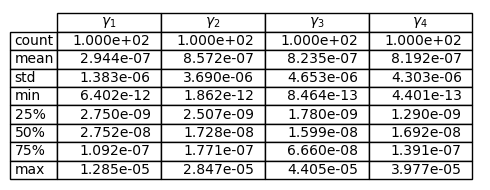

In [45]:
data = ((erros_abs_concat.T).iloc[:, :4]).describe()

fmt_data = data.applymap(lambda x: f"{x:.3e}")  # notação científica com 3 casas
fig, ax = plt.subplots(figsize=(5,2))
ax.axis("off")
ax.axis("tight")
tbl = ax.table(
    cellText=fmt_data.values,
    colLabels=data.columns,
    rowLabels=data.index,
    loc="best"
)
tbl.auto_set_font_size(False)
#tbl.set_fontsize(6)
fig.tight_layout()
plt.savefig(f"data_mse_gammas_Nc{N}.png", dpi=300, bbox_inches="tight")

Esssa é um descriçao estatistica para apenas os parametros J

In [46]:
((erros_abs_concat.T).iloc[:, 4:]).describe()

,$JXX$,$JXY$,$JXZ$,$JYX$,$JYY$,$JYZ$,$JZX$,$JZY$,$JZZ$,$JIX$,$JIY$,$JIZ$,$JXI$,$JYI$,$JZI$
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.084377e-06,1.307500e-06,4.053269e-06,1.032655e-06,8.282066e-07,2.637513e-06,1.027371e-06,7.487493e-07,7.226506e-07,1.081731e-06,8.750778e-07,8.207956e-07,8.390143e-07,9.036105e-07,2.010057e-06
std,5.714969e-06,7.974220e-06,2.890501e-05,4.547489e-06,2.596947e-06,1.739330e-05,5.207772e-06,4.217758e-06,2.976882e-06,5.565872e-06,3.913360e-06,3.373885e-06,3.990488e-06,4.526296e-06,1.370682e-05
min,4.517662e-11,2.700532e-11,4.410693e-11,5.957057e-12,6.446139e-13,1.403930e-11,1.588502e-11,2.843918e-11,4.770958e-11,1.965420e-11,2.868843e-12,8.746089e-12,3.495772e-12,1.883633e-12,5.073647e-12
25%,1.508636e-08,1.528039e-08,1.967247e-08,1.536389e-08,1.030887e-08,1.326431e-08,7.922682e-09,7.005649e-09,1.461231e-08,1.061281e-08,1.208479e-08,1.332960e-08,5.622212e-09,7.239202e-09,7.574885e-09
50%,7.334296e-08,6.667532e-08,1.226411e-07,8.349279e-08,6.374537e-08,8.543787e-08,6.607605e-08,3.763705e-08,6.094897e-08,6.304087e-08,9.551491e-08,4.404994e-08,4.370928e-08,4.737413e-08,6.051472e-08
75%,3.430938e-07,2.114995e-07,5.262584e-07,3.002377e-07,2.221441e-07,3.998467e-07,2.466399e-07,1.814635e-07,3.883373e-07,2.064239e-07,4.339093e-07,1.538066e-07,2.554177e-07,1.729500e-07,4.552434e-07
max,5.504628e-05,7.105991e-05,2.846183e-04,3.715970e-05,1.493769e-05,1.709592e-04,4.880244e-05,3.644344e-05,2.717217e-05,5.386856e-05,3.722666e-05,2.736576e-05,3.537090e-05,4.219425e-05,1.363697e-04


/tmp/ipykernel_14851/3668189080.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fmt_data = data.applymap(lambda x: f"{x:.3e}")  # notação científica com 3 casas


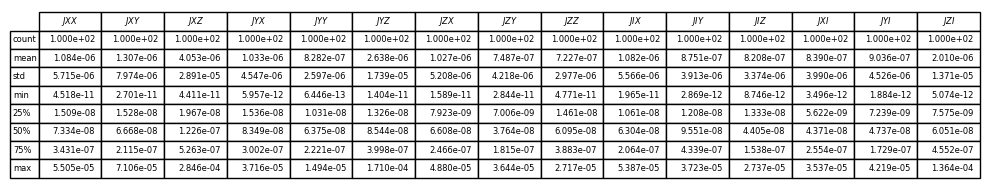

In [47]:
data = ((erros_abs_concat.T).iloc[:, 4:]).describe()

fmt_data = data.applymap(lambda x: f"{x:.3e}")  # notação científica com 3 casas
fig, ax = plt.subplots(figsize=(10,2))
ax.axis("off")
ax.axis("tight")
tbl = ax.table(
    cellText=fmt_data.values,
    colLabels=data.columns,
    rowLabels=data.index,
    loc="center"
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(6)
fig.tight_layout()
plt.savefig(f"data_mse_j_Nc{N}.png", dpi=300, bbox_inches="tight")

### all

/tmp/ipykernel_14851/2139492730.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fmt_data = data1.applymap(lambda x: f"{x:.3e}")  # notação científica com 3 casas


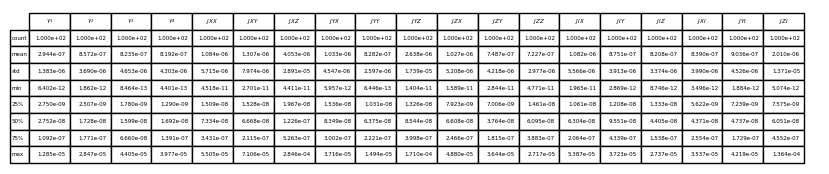

In [48]:
fig, ax = plt.subplots(figsize=(10,2))

data1 = ((erros_abs_concat.T)).describe()
fmt_data = data1.applymap(lambda x: f"{x:.3e}")  # notação científica com 3 casas
tbl = ax.table(
    cellText=fmt_data.values,
    colLabels=data1.columns,
    rowLabels=data1.index,
    loc="best"
)

ax.axis("off")
ax.axis("tight")

plt.savefig(f"data_mse_all_Nc{N}.png", dpi=300, bbox_inches="tight")